### データ理解

In [257]:
classes = {
    0 : '0',
    1 : '1',
}
classes

{0: '0', 1: '1'}

In [258]:
import tensorflow as tf

x_train = tf.constant(
    [

        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
        ],
    ]
)

In [259]:
x_train.shape

TensorShape([2, 5, 5])

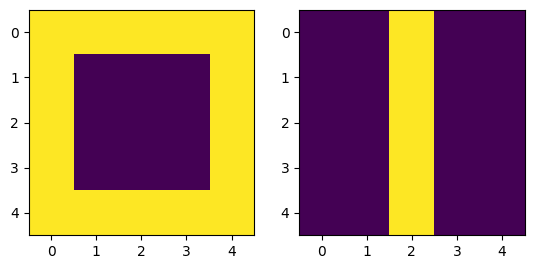

In [260]:
import matplotlib.pyplot as plt

words = x_train.shape[0]

for i in range(words):
    plt.subplot(1, words, i+1)
    plt.imshow(x_train[i])
plt.show()

In [261]:
y_train = tf.constant([0., 1.])

### モデル構築

In [262]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(32)
        self.fc2 = tf.keras.layers.Dense(32)
        self.fc3 = tf.keras.layers.Dense(32)
        self.fc4 = tf.keras.layers.Dense(2)

    def call(self, x):
        x = self.flatten(x)
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = tf.nn.relu(self.fc3(x))
        x = tf.nn.softmax(self.fc4(x))
        print(x)
        return x

In [263]:
model = Model()
model(x_train)

tf.Tensor(
[[0.63099694 0.3690031 ]
 [0.7061952  0.29380482]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.63099694, 0.3690031 ],
       [0.7061952 , 0.29380482]], dtype=float32)>

### ハイパーパラメータ設定

In [264]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
epochs = 100

### 訓練

In [265]:
model.compile(loss=loss, optimizer=optimizer)
hist = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/100
Tensor("model_37/Softmax:0", shape=(None, 2), dtype=float32)
Tensor("model_37/Softmax:0", shape=(None, 2), dtype=float32)
1/1 [==============================] - 1s 1s/step - loss: 0.8426
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8053
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7708
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7381
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7072
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6791
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6526
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6294
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6117
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5952
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5784
Epoch 12/1

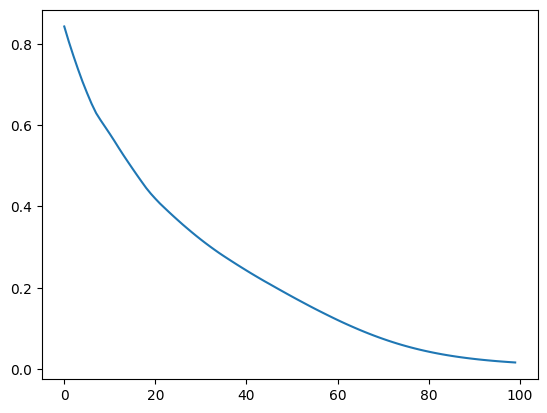

In [266]:
plt.plot(hist.history['loss'])
plt.show()

### 推論

In [267]:
x_pred = tf.constant(
    [
        [
            [1., 1., 1., 1., 1.],
            [1., 1., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 1., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [0., 1., 1., 0., 0.],
            [1., 0., 1., 0., 0.],
            [0., 0., 1., 0., 0.],
            [0., 0., 1., 0., 0.],
            [0., 0., 1., 0., 0.],
        ],
    ]
)

In [268]:
y_pred = model.predict(x_pred)
[classes[x] for x in tf.math.argmax(y_pred, axis=1).numpy()]

Tensor("model_37/Softmax:0", shape=(None, 2), dtype=float32)
1/1 [==============================] - 0s 53ms/step


['0', '1']